# Small Random Search

In [1]:
from utils.config import automl_config
import numpy as np
from utils.callbacks import Verbose
from dataset.dataloader import LoadDataLoader
from dragon.utils.tools import logger
from utils.trainer import Trainer

config = automl_config
config['filename'] = 'dataset/data.csv'
config['target'] = 'conso_rte'
config['FeaturesCallbacks'].append(Verbose(logger))
config['WeightsCallbacks'].append(Verbose(logger))
data_loader = LoadDataLoader(config)
# Number of epochs to train the features
config['MaxFeaturesEpochs'] = 2
sp = config['SearchSpace'](config)
trainer = Trainer(data_loader)
trainer.labels = [e.label for e in sp]
# Number of epochs to train the models weights
trainer.config['Ep'] = 10

We randomly generate and train models:

In [2]:
models = sp.random(5)

Model 1

Features:  ['f_2', 'f_4', 'f_6', 'f_7', 'f_8', 'f_10', 'f_13', 'f_14', 'f_16', 'f_18', 'f_22', 'f_24', 'f_25', 'f_27', 'f_28', 'f_29']


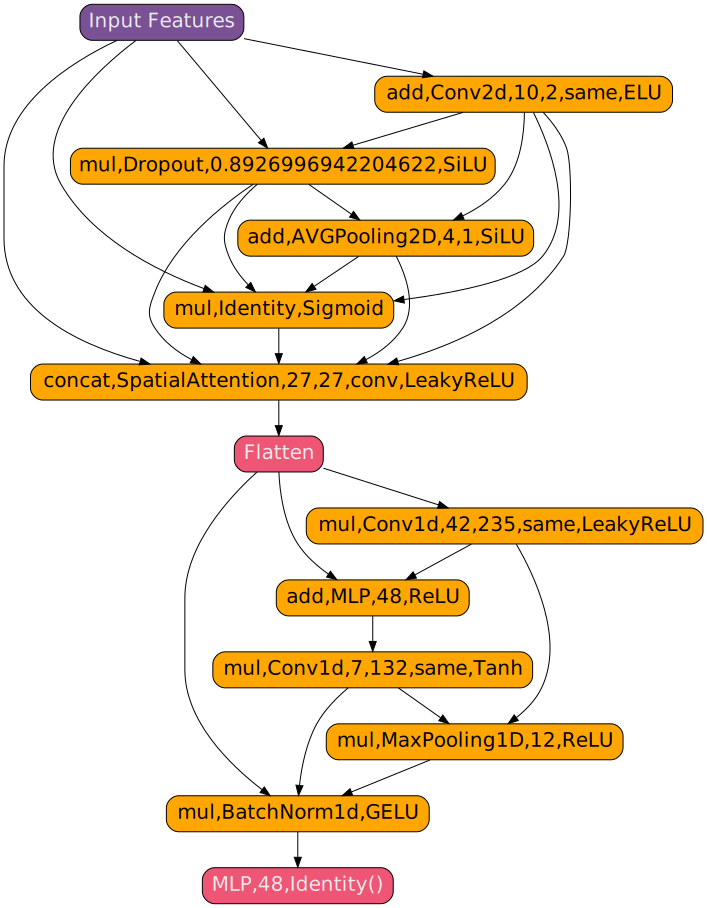

In [3]:
from dragon.utils.plot_functions import draw_graph, get_name_features, str_operations
m = models[1]
features = get_name_features(m[0], automl_config)
print("Features: ", features)
m1 = m[1].matrix
n1 = str_operations(m[1].operations)
m2 = m[2].matrix
n2 = str_operations(m[2].operations)

G = draw_graph(n1, m1, n2, m2, "dataset/save/figures/small_example_1")
G

In [4]:
loss, model = trainer.train_and_test(m)

2024-02-27 14:12:52,827 | INFO | Epoch 0 ==> Opt Features train loss: 0.20796623826026917, val loss: 0.015495622530579567
2024-02-27 14:13:47,027 | INFO | Epoch 1 ==> Opt Features train loss: 0.007111828308552504, val loss: 0.0057121505960822105
2024-02-27 14:14:38,226 | INFO | Epoch 0 ==> Opt Weights train loss: 0.04013071954250336, val loss: 0.02204403653740883
2024-02-27 14:15:31,311 | INFO | Epoch 1 ==> Opt Weights train loss: 0.017028512433171272, val loss: 0.018465925008058548
2024-02-27 14:16:24,747 | INFO | Epoch 2 ==> Opt Weights train loss: 0.007214091252535582, val loss: 0.009949177503585815
2024-02-27 14:17:25,655 | INFO | Epoch 3 ==> Opt Weights train loss: 0.004919897299259901, val loss: 0.004211104474961758
2024-02-27 14:18:28,155 | INFO | Epoch 4 ==> Opt Weights train loss: 0.0027230822015553713, val loss: 0.0028106626123189926
2024-02-27 14:19:26,741 | INFO | Epoch 5 ==> Opt Weights train loss: 0.0018806718289852142, val loss: 0.0018489040667191148
2024-02-27 14:20:25,